# Fast Operations Through *ufuncs* 

This notebook explores vectorised operations through the so-called *universal functions* or ufuncs that lie behind the fast calculations possible in NumPy.

# Death by Loop

A function to calculate modulus might be written as follows:

In [59]:
import numpy as np
np.random.seed(4)

def find_modulus(vals, mod):
    '''Returns modulus'''
    if not np.any(vals): return None
    if not mod: return None

    temp = np.empty(len(vals))
    for i in range(len(vals)):
        temp[i] = vals[i] % mod
    return temp
        
values = np.random.randint(1, 1000, size=1000000)

%timeit find_modulus(values, 2)


1 loop, best of 3: 400 ms per loop


# In *ufuncs* we believe!

Let's do the same operation using NumPy's vectorised operation.

In [60]:
%timeit values % 2

100 loops, best of 3: 5.02 ms per loop


The vectorised modulus operation ran more than 80 times faster!

As noted above, NumPy implements vectorized operations through universal functions. Such operations can be applied between scalars and arrays, and between arrays themselves. The arrays can have one or more dimensions.

An example of vectorised operations between 2 arrays:

In [61]:
np.arange(10) ** np.arange(10)

array([        1,         1,         4,        27,       256,      3125,
           46656,    823543,  16777216, 387420489], dtype=int32)

Who knew 0 raised to 0 is 1?

Let's see multi-dimensional arrays in action using ufuncs!

In [62]:
a = np.arange(16).reshape(4, 4)
b = np.arange(16, 32).reshape(4, 4)
print(a, "\n\n", b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 

 [[16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [63]:
print(a + b)

[[16 18 20 22]
 [24 26 28 30]
 [32 34 36 38]
 [40 42 44 46]]


The usual airthematic operators +, -, \*, %, \*\*, / and // (floor division) are recognised by unfuncs. These operators are actually wrrapers for np.add(), np.subtract(), np.multiply(), np.mod(), np.power(), np.divide() and np.floor_divide(), respectively.  

There is also a unary negative for unary negation. It is a wrapper for np.negative(). 

In [64]:
print(-np.arange(10))

[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]


In [65]:
print(np.negative(np.arange(10)))

[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]


Then, there is the joy of the absolute.

In [66]:
np.abs(np.arange(-10, 1))

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

Needless to say, all these operators can be used at the same time, and they follow the standarnd order of operation

In [67]:
a = np.random.randint(10, size=15)
b = np.arange(15)

In [69]:
print(a, "\n", b)

[0 6 2 1 3 6 1 6 4 3 2 5 8 9 1] 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [70]:
print(a+b**2-1)

[ -1   6   5   9  18  30  36  54  67  83 101 125 151 177 196]


# The Joy of Trigs

Did we seriously entertain the idea that NumPy *ufuncs* would not implement trigonometric functions? Nah.

(-20, 20)

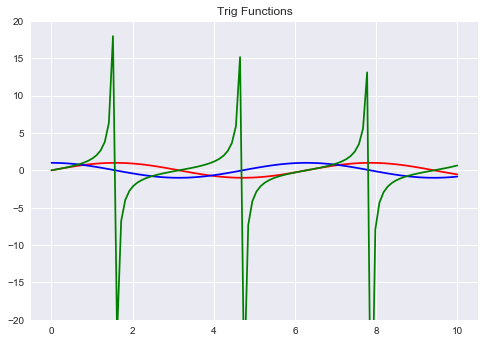

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'r')
plt.plot(x, np.cos(x), 'b')
plt.plot(x, np.tan(x), 'g')
plt.title('Trig Functions')
plt.ylim(-20, 20)

Of course, inverse trig functions are also implemented by *ufuncs*.

# Logarithms and Exponents

Logarithmic and exponential functions are also available in *ufuncs*.

(0, 3.4880244996317304)

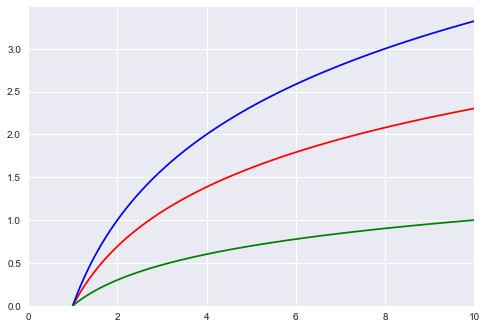

In [72]:
x = np.linspace(1, 10, 100)

plt.plot(x, np.log(x), 'r') # natural log
plt.plot(x, np.log2(x), 'b') # log2
plt.plot(x, np.log10(x), 'g') # log10
plt.xlim(0, 10)
plt.ylim(0)

(0, 28.300000000000001)

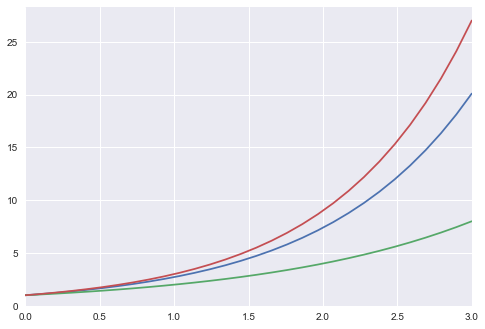

In [74]:
x = np.linspace(0, 3, 30)

plt.plot(x, np.exp(x)) # exponential function
plt.plot(x, np.exp2(x))
plt.plot(x, np.power(3, x))
plt.xlim(0, 3)
plt.ylim(0)